# MERGE DATAFRAME

In [33]:
# Import Libs
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
# Loading Data
dataset = load_dataset(path='lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

### 1. Create 2 sample datasets that will be used as a dimesion table

In [3]:

job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)



In [4]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [5]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


### 2. Merge those 2 tables: df_jobs & df_companies 

In [11]:
df_jobs.merge(df_companies,on=['company_name'])

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


--> It's pretty much the same with JOIN function in SQL, we can choose Join Type by using "how" param

--> We can input column on which those 2 tables are merged together by using "on" param (mandantory)

### 3. Import a data table containing job posting counts of other tech jobs throughout 2023 by using read_csv function to read a website link

In [21]:
# sw stands for software
df_sw_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col= 'job_posted_month')

### 4. Recreate a pivot table that I have just created in the previous lecture

In [23]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')
df_USA =  df[df['job_country'] == "United States"].copy()
df_ds_pivot = df_USA.pivot_table(index='job_posted_month',columns= 'job_title_short',aggfunc='size')
df_ds_pivot.reset_index(inplace=True)
df_ds_pivot['month_no'] = pd.to_datetime(df_ds_pivot['job_posted_month'],format= '%B').dt.month

df_ds_pivot.sort_values(by= 'month_no',inplace=True)
df_ds_pivot.set_index(keys= 'job_posted_month',inplace= True)
df_ds_pivot.drop(columns= 'month_no',inplace=True)

df_ds_pivot # ds stand for data science

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


### 5. Merge df_ds_pivot and df_sw_pivot together, create a chart to view the top 5 tech jobs in the US.

In [26]:
df_US_merged = df_ds_pivot.merge(df_sw_pivot, on='job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [27]:
jobtitle_sum = df_US_merged.sum()

jobtitle_sum

Business Analyst               7382
Cloud Engineer                  423
Data Analyst                  67816
Data Engineer                 35080
Data Scientist                58830
Machine Learning Engineer       921
Senior Data Analyst           11791
Senior Data Engineer           9289
Senior Data Scientist         12946
Software Engineer              1814
Front-End Developer          151067
Back-End Developer           104700
Full-Stack Developer          75873
UI/UX Designer                52169
dtype: int64

--> use SUM fx to sum up every column of a Pivot table, how handy it is!!!  

In [30]:
top_5 = (
    df_US_merged
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index # get the index column (Job title) of top 5
    .to_list()
    ) # put these long-ass code inside the parentheses so you can reformat it
top_5

Index(['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer',
       'Data Analyst', 'Data Scientist'],
      dtype='object')

--> get the names of top 5 countries in the merged dataframe

<Axes: xlabel='job_posted_month'>

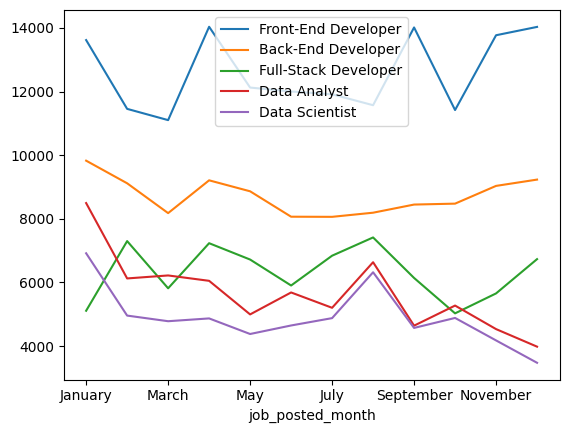

In [31]:
df_US_merged_5 = df_US_merged[top_5].copy()
df_US_merged_5.plot(kind='line')

--> however it's a little bit messy, let's clean this chart up babyyy

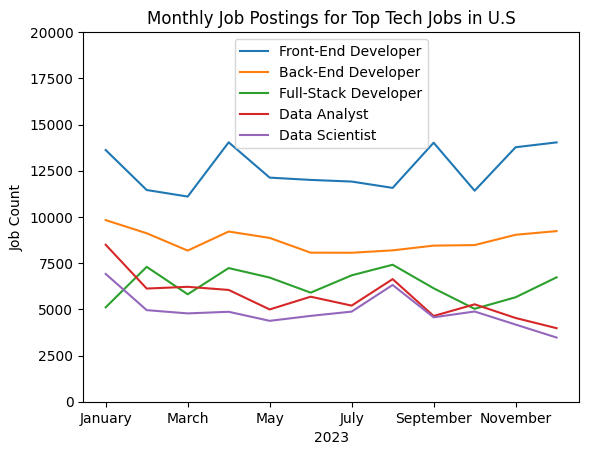

In [37]:
df_US_merged_5.plot(kind='line')
plt.title("Monthly Job Postings for Top Tech Jobs in U.S")
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.legend()
plt.show()

--> much cleaner and clearer for the audience